In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import seaborn as sb



In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/YBI-Foundation/Dataset/main/MPG.csv')

In [ ]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [ ]:
data.shape

(398, 9)

In [ ]:
data.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


In [ ]:
data.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [ ]:
print("mean of horsepower; ", data['horsepower'].mean())
print("median of horsepower; ", data['horsepower'].median())
print("mode of horsepower; ", data['horsepower'].mode())

mean of horsepower;  104.46938775510205
median of horsepower;  93.5
mode of horsepower;  0    150.0
dtype: float64


In [ ]:
mean = data["horsepower"].mean()
data["horsepower"] = data["horsepower"].fillna(mean)

In [ ]:
data.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


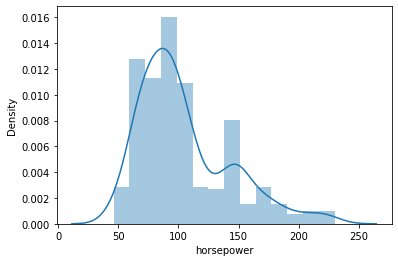

In [ ]:
sb.distplot(data.horsepower);

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


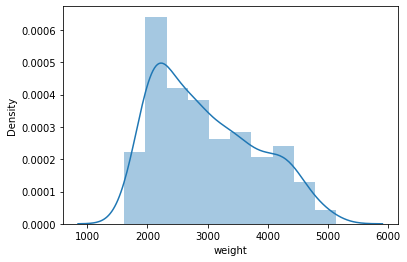

In [ ]:
sb.distplot(data.weight);

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


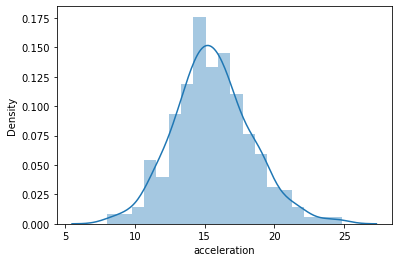

In [ ]:
sb.distplot(data.acceleration)


In [ ]:
# skewness and Kurtosis

print("Range of SKEWNESS and KURTOSIS to be between -1 and +1 for all the Predictors")

print("Skewness of 'horsepower': ", stats.skew(data.horsepower))
print("Skewness of 'weight': ", stats.skew(data.weight))
print("Skewness of 'acceleration': ", stats.skew(data.acceleration))

print("Kurtosis of 'horsepower': ", stats.kurtosis(data.horsepower))
print("Kurtosis of 'weight': ", stats.kurtosis(data.weight))
print("Kurtosis of 'acceleration': ", stats.kurtosis(data.acceleration))

Range of SKEWNESS and KURTOSIS to be between -1 and +1 for all the Predictors
Skewness of 'horsepower':  1.0914191838332945
Skewness of 'weight':  0.5290589216608383
Skewness of 'acceleration':  0.27772507624356363
Kurtosis of 'horsepower':  0.7290385466123319
Kurtosis of 'weight':  -0.7907326965772179
Kurtosis of 'acceleration':  0.3992077323931644


In [ ]:
X = data.loc[:,['horsepower', 'weight', 'acceleration']]
y = data.mpg

In [ ]:
# Splitting the dataset into Train and Test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=45)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

print("y_train shape:", y_train.shape)
print("y_train shape:", y_test.shape)

X_train shape: (278, 3)
X_test shape: (120, 3)
y_train shape: (278,)
y_train shape: (120,)


MODEL Fitting

In [ ]:
model = LinearRegression()

model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_predict = model.predict(X_test)

In [ ]:
r2_score(y_test, y_predict)*100

65.54444916998196

Linear regression Model is 65.54% accurate

In [ ]:
poly_regs= PolynomialFeatures(degree= 1)  
x_poly= poly_regs.fit_transform(X_train)  
model.fit(x_poly,y_train)

LinearRegression()

In [ ]:
poly_predict = poly_regs.fit_transform(X_test)

In [ ]:
poly_predict

array([[ 1.00000000e+00, -4.46031836e-01, -2.98720999e-01,
        -3.66981196e-02],
       [ 1.00000000e+00, -9.73427194e-01, -1.04813693e+00,
         8.22424176e-01],
       [ 1.00000000e+00, -1.94891189e-01,  6.22316895e-01,
         1.25198532e+00],
       [ 1.00000000e+00, -8.98085000e-01, -8.42190564e-01,
         5.00253315e-01],
       [ 1.00000000e+00, -7.72514676e-01, -8.59352761e-01,
        -3.58868980e-01],
       [ 1.00000000e+00,  1.53797927e+00,  2.20238315e+00,
        -1.07480423e+00],
       [ 1.00000000e+00, -1.50082255e+00, -1.17971377e+00,
         1.96792057e+00],
       [ 1.00000000e+00,  1.48775114e+00,  5.30785179e-01,
        -7.52633366e-01],
       [ 1.00000000e+00, -4.96259965e-01, -8.63929347e-01,
         3.57066266e-01],
       [ 1.00000000e+00, -1.90927363e-02,  8.51146185e-01,
         1.25198532e+00],
       [ 1.00000000e+00,  9.85469851e-01,  1.66921090e+00,
        -5.37852792e-01],
       [ 1.00000000e+00,  4.83188557e-01,  1.05137181e+00,
      